In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        img[i,j] =  0 if img[i,j] < 128 else 255
cv2.imshow('binary',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Binarize.png',img)

True

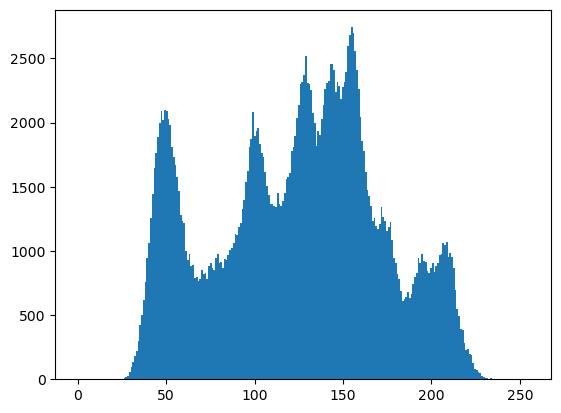

In [10]:
bin = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
count = [0] * 256
for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        count[bin[i,j]] = count[bin[i,j]] + 1

plt.hist([i for i in range(0,256)],weights=count,bins=256)
plt.savefig("histogram")

In [5]:

#four connected
img = cv2.imread('Binarize.png', cv2.IMREAD_GRAYSCALE)
# start with 1
region_label = 1
region_pixel_count = {}
region_sets = {}
img = img.astype('int64')
# first pass
for row in range(img.shape[1]):
    for col in range(img.shape[0]):
        # print(row,col)
        if img[row,col] == 0:
            continue
        left = img[row,col-1]
        up = img[row-1,col]
        if col > 0 and left != 0:
            img[row,col] = left
            region_pixel_count[img[row,col]] = region_pixel_count[img[row,col]] + 1 
        elif row > 0 and up != 0:
            img[row,col] = up
            region_pixel_count[img[row,col]] = region_pixel_count[img[row,col]] + 1
        else:
            img[row,col] = region_label
            region_sets[region_label] = {region_label}
            region_pixel_count[region_label] = 1
            region_label = region_label + 1
                        
        if row > 0 and col > 0 and left != 0 and up != 0 and left != up:
            uset = region_sets[left].union(region_sets[up])
            for sid in uset:
                region_sets[sid] = uset

In [6]:
# second pass
for row in range(img.shape[1]):
    for col in range(img.shape[0]):
        if img[row,col] == 0:
            continue
        reg = img[row,col]
        root_set = min(region_sets[reg])
        if reg != root_set :
            img[row,col] = root_set
            
for reg in list(region_sets.keys()):
    root_set = min(region_sets[reg])
    if  root_set != reg:
        # print(root_set,reg)
        region_pixel_count[root_set] = region_pixel_count[root_set] + region_pixel_count[reg]
        region_pixel_count.pop(reg)
        region_sets.pop(reg)

# filter
MIN_PIXEL = 500
for reg in list(region_pixel_count.keys()):
    if region_pixel_count[reg] < MIN_PIXEL:
        region_pixel_count.pop(reg)
        region_sets.pop(reg)

In [7]:
# boundary box 
b_top = {}
b_bottom = {}
b_left = {}
b_right = {}
for row in range(img.shape[1]):
    for col in range(img.shape[0]):
        reg = img[row,col]
        if reg == 0 or reg not in region_sets.keys():
            continue        
        if reg not in b_top.keys():
            b_top[reg] = b_bottom[reg] = row
            b_left[reg] = b_right[reg] = col
        else:
            b_top[reg] = min(b_top[reg],row)
            b_bottom[reg] = max(b_bottom[reg],row)
            b_left[reg] = min(b_left[reg],col)
            b_right[reg] = max(b_right[reg],col)\

            

In [8]:
#centroid
row_pixel_count = {}
c_row = {}
for reg in region_sets.keys():
    c_row[reg] = 0
for row in range(img.shape[1]):
    for reg in region_sets.keys():
        row_pixel_count[reg] = 0
    for col in range(img.shape[0]): 
        reg = img[row,col]
        if reg == 0 or reg not in region_sets.keys():
            continue
        row_pixel_count[reg] = row_pixel_count[reg] + 1
    for reg in region_pixel_count.keys():
        c_row[reg] = c_row[reg] + (row_pixel_count[reg] * row) / region_pixel_count[reg]
    
        
col_pixel_count = {} 
c_col = {}
for reg in region_sets.keys():
    c_col[reg] = 0
for col in range(img.shape[0]):
    for reg in region_sets.keys():
        col_pixel_count[reg] = 0
    for row in range(img.shape[1]): 
        reg = img[row,col]
        if reg == 0 or reg not in region_sets.keys():
            continue
        col_pixel_count[reg] = col_pixel_count[reg] + 1
    for reg in region_pixel_count.keys():
        c_col[reg] = c_col[reg] + (col_pixel_count[reg] * col) / region_pixel_count[reg]

In [9]:
result = cv2.imread('Binarize.png')
for reg in region_sets.keys():
    cv2.rectangle(result,(b_left[reg],b_top[reg]),(b_right[reg],b_bottom[reg]),(255,0,0),3)
    cv2.circle(result,(int(c_col[reg]),int(c_row[reg])),1,(0,0,255),5)
cv2.imshow('result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('result.png',result)

True